In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("../../data/ex2data1.txt", delimiter=",")

In [4]:
df = pd.DataFrame(data)
df.columns

RangeIndex(start=0, stop=3, step=1)

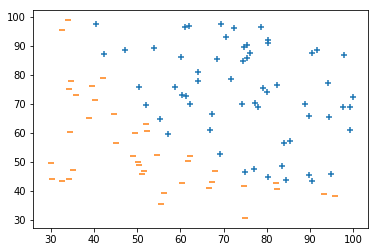

In [157]:
positive = df.loc[df[2] == 1]
nagetive = df.loc[df[2] == 0]
plt.scatter(positive[0], positive[1], marker="+")
plt.scatter(nagetive[0], nagetive[1], marker="_")
plt.show()

In [160]:
print df.iloc[:10, :2]
df.iloc[:10, 2]

           0          1
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
5  45.083277  56.316372
6  61.106665  96.511426
7  75.024746  46.554014
8  76.098787  87.420570
9  84.432820  43.533393


0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: 2, dtype: float64

In [166]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable([[0.1],[0.1]])
b = tf.Variable([-13.0])
prob = tf.nn.sigmoid(tf.matmul(X,W)+b)
# prob = tf.matmul(X,W)+b

In [167]:
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print sess.run(prob, {X: df.iloc[:10, :2]})

[[ 0.14992817]
 [ 0.00375154]
 [ 0.10668686]
 [ 0.83877146]
 [ 0.91965818]
 [ 0.05416491]
 [ 0.94057685]
 [ 0.30108744]
 [ 0.96616817]
 [ 0.44932988]]


In [178]:
# cost = tf.reduce_sum((Y-1)*tf.log(1-prob)-Y*tf.log(prob))
# cost = tf.reduce_sum((Y-1)*tf.log(1.0-prob)-(Y*tf.log(prob)), reduction_indices=[0])
cost = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(prob)) - ((1.0 - Y) * tf.log(1 - prob)), reduction_indices=[1]))

learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [179]:
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print sess.run(W)
    print sess.run(cost, {X: df.iloc[:, :2], Y: df.iloc[:,2].reshape([100,1])})
    
    for i in range(10000):
        sess.run(optimizer, {X: df.iloc[:, :2], Y: df.iloc[:,2].reshape([100,1])})
#         print sess.run(cost, {X: df.iloc[:, :2], Y: df.iloc[:,2].reshape([100,1])})
        
    [w_, b_] = sess.run([W, b])
    
    print sess.run(cost, {X: df.iloc[:, :2], Y: df.iloc[:,2].reshape([100,1])})

[[ 0.1]
 [ 0.1]]
0.276134


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


0.240037


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


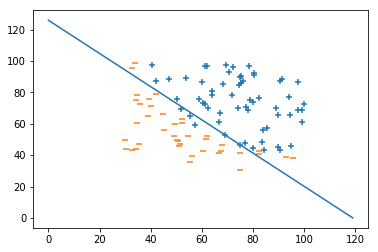

array([[ 0.10987167],
       [ 0.10387606]], dtype=float32)

In [182]:
plt.scatter(positive[0], positive[1], marker="+")
plt.scatter(nagetive[0], nagetive[1], marker="_")
plt.plot([(-b_/w_)[0][0], 0], [0, (-b_/w_)[1][0]])
plt.show()
w_

In [156]:
df.iloc[:10,2]

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: 2, dtype: float64